In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [78]:
# O '\s*;\s*' tira os espaços antes dos campos (o '?' e 'salary-classification' tinham)
training = pd.read_csv("../training.csv", sep = '\s*;\s*', engine = 'python', na_values = '?')
test = pd.read_csv("../test.csv", sep = '\s*;\s*', engine = 'python', na_values = '?')

In [79]:
training.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary-classification
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [80]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   age                    32561 non-null  int64 
 1   workclass              30725 non-null  object
 2   fnlwgt                 32561 non-null  int64 
 3   education              32561 non-null  object
 4   education-num          32561 non-null  int64 
 5   marital-status         32561 non-null  object
 6   occupation             30718 non-null  object
 7   relationship           32561 non-null  object
 8   race                   32561 non-null  object
 9   sex                    32561 non-null  object
 10  capital-gain           32561 non-null  int64 
 11  capital-loss           32561 non-null  int64 
 12  hours-per-week         32561 non-null  int64 
 13  native-country         31978 non-null  object
 14  salary-classification  32561 non-null  object
dtypes: int64(6), object

In [81]:
training.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


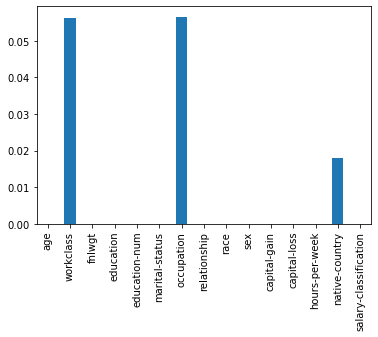

In [82]:
percent_missing = training.isnull().sum() / len(training)
percent_missing.plot(kind = 'bar')
plt.show()

#### Não existem missing values consideráveis para a remoção de features

In [83]:
training[training['workclass'].isna() == True]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary-classification
27,54,NaN,180211,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,NaN,293936,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,40,NaN,<=50K
69,25,NaN,200681,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,NaN,212759,10th,6,Married-civ-spouse,NaN,Husband,White,Male,0,0,2,United-States,<=50K
106,17,NaN,304873,10th,6,Never-married,NaN,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,NaN,320084,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,>50K
32531,30,NaN,33811,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,NaN,287372,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,>50K
32541,41,NaN,202822,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,<=50K


(array([5570., 5890., 6048., 6163., 3967., 2591., 1595.,  496.,  174.,
          67.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <BarContainer object of 10 artists>)

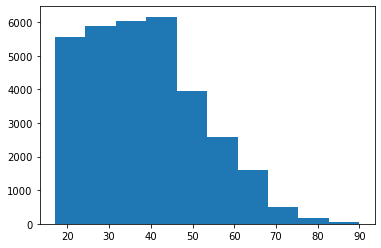

In [84]:
plt.hist(x = training['age'])

In [85]:
training['age'] = pd.qcut(training['age'], q = 4)
training = training.rename(columns = {'age':'ageBinned'})

test['age'] = pd.qcut(test['age'], q = 4)
test = test.rename(columns = {'age':'ageBinned'})

In [86]:
training['ageBinned'] = training['ageBinned'].astype('category').cat.codes
test['ageBinned'] = test['ageBinned'].astype('category').cat.codes

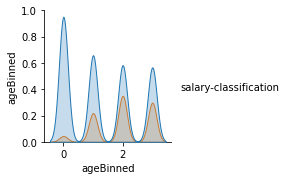

In [87]:
group = training[['ageBinned', 'salary-classification']]
sns.pairplot(group, hue = 'salary-classification')
plt.savefig('na.pdf', format = 'pdf')

#### Tornar algumas variáveis em categóricas

In [88]:
training['workclass'] = training['workclass'].astype('category')
training['education'] = training['education'].astype('category')
training['marital-status'] = training['marital-status'].astype('category')
training['occupation'] = training['occupation'].astype('category')
training['relationship'] = training['relationship'].astype('category')
training['race'] = training['race'].astype('category')
training['native-country'] = training['native-country'].astype('category')
training['sex'] = training['sex'].astype('category')
training['salary-classification'] = training['salary-classification'].astype('category')

test['workclass'] = test['workclass'].astype('category')
test['education'] = test['education'].astype('category')
test['marital-status'] = test['marital-status'].astype('category')
test['occupation'] = test['occupation'].astype('category')
test['relationship'] = test['relationship'].astype('category')
test['race'] = test['race'].astype('category')
test['native-country'] = test['native-country'].astype('category')
test['sex'] = test['sex'].astype('category')
test['salary-classification'] = test['salary-classification'].astype('category')

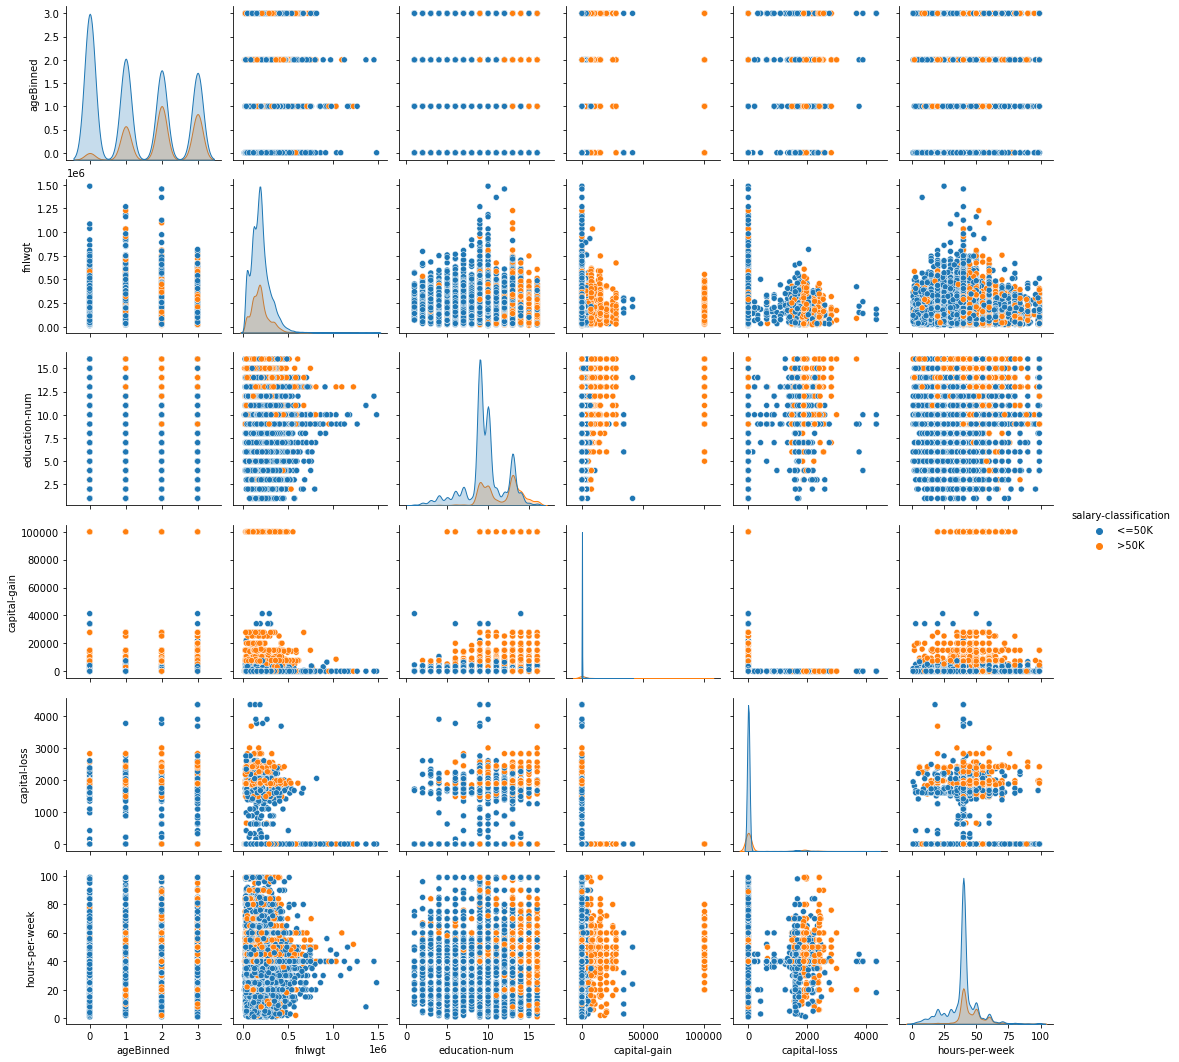

In [89]:
sns.pairplot(training, hue = 'salary-classification')

#### Capital gain e capital loss com pouca dispersão de dados

In [90]:
training['capital-loss']

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    0
32559    0
32560    0
Name: capital-loss, Length: 32561, dtype: int64

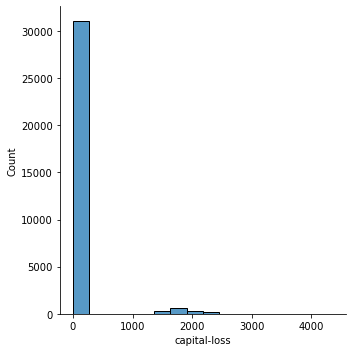

In [91]:
sns.displot(training, x = 'capital-loss')

<AxesSubplot:xlabel='capital-loss', ylabel='Count'>

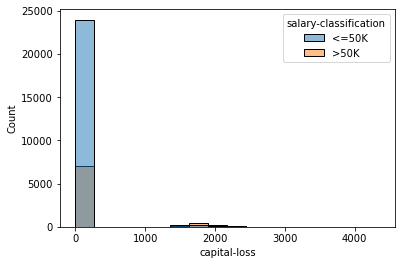

In [92]:
sns.histplot(training, x = 'capital-loss', hue = 'salary-classification', color = ['blue', 'red'])

#### Tentativa da discretização das variáveis 'capital-loss' e 'capital-gain' em dois intervalos. Estes dois intervalos seriam divididos naqueles com valor 0 e os diferentes desse valor

* Após a execução desta discretização, verificou-se uma descida acentuada da accuracy dos modelos. Por isso mesmo, esta discretização foi posta de parte


In [93]:
'''
res = []
for i in range(len(training)):
    if training.iloc[i]['capital-loss'] > 0:
        res.append(1)
    else:
        res.append(0)

training['res'] = res

training = training.drop(columns = 'capital-loss')
training = training.rename(columns = {'res':'capital-loss'})  
'''

"\nres = []\nfor i in range(len(training)):\n    if training.iloc[i]['capital-loss'] > 0:\n        res.append(1)\n    else:\n        res.append(0)\n\ntraining['res'] = res\n\ntraining = training.drop(columns = 'capital-loss')\ntraining = training.rename(columns = {'res':'capital-loss'})  \n"

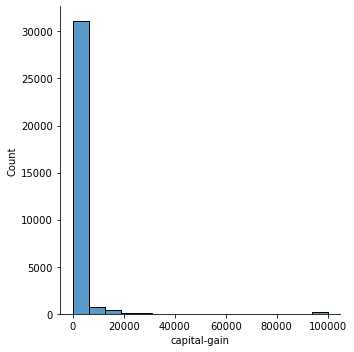

In [94]:
sns.displot(training, x = 'capital-gain')

In [95]:
'''
res = []
for i in range(len(training)):
    if training.iloc[i]['capital-gain'] > 0:
        res.append(1)
    else:
        res.append(0)

training['res'] = res

training = training.drop(columns = 'capital-gain')
training = training.rename(columns = {'res':'capital-gain'})  
'''

"\nres = []\nfor i in range(len(training)):\n    if training.iloc[i]['capital-gain'] > 0:\n        res.append(1)\n    else:\n        res.append(0)\n\ntraining['res'] = res\n\ntraining = training.drop(columns = 'capital-gain')\ntraining = training.rename(columns = {'res':'capital-gain'})  \n"

In [96]:
'''
from sklearn import preprocessing
training['capital-loss'] = preprocessing.MinMaxScaler().fit_transform(training[['capital-loss']])
test['capital-loss'] = preprocessing.MinMaxScaler().fit_transform(test[['capital-loss']])

training['capital-gain'] = preprocessing.MinMaxScaler().fit_transform(training[['capital-gain']])
test['capital-gain'] = preprocessing.MinMaxScaler().fit_transform(test[['capital-gain']])
'''

"\nfrom sklearn import preprocessing\ntraining['capital-loss'] = preprocessing.MinMaxScaler().fit_transform(training[['capital-loss']])\ntest['capital-loss'] = preprocessing.MinMaxScaler().fit_transform(test[['capital-loss']])\n\ntraining['capital-gain'] = preprocessing.MinMaxScaler().fit_transform(training[['capital-gain']])\ntest['capital-gain'] = preprocessing.MinMaxScaler().fit_transform(test[['capital-gain']])\n"

In [97]:
training['capital'] = training['capital-gain'] - training['capital-loss']
test['capital'] = test['capital-gain'] - test['capital-loss']

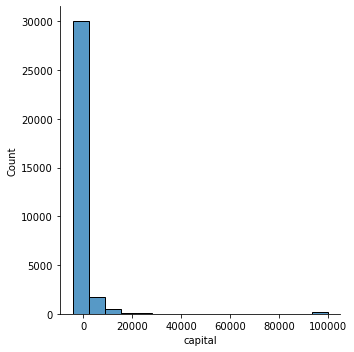

In [98]:
sns.displot(training, x = 'capital')

In [99]:
training = training.drop(columns = ['capital-loss', 'capital-gain'])
test = test.drop(columns = ['capital-loss', 'capital-gain'])

In [100]:
training = training[['ageBinned', 'workclass', 'fnlwgt', 'education', 'education-num',
                     'marital-status', 'occupation', 'relationship', 'race', 'sex',
                     'hours-per-week', 'native-country', 'capital', 'salary-classification']]
test = test[['ageBinned', 'workclass', 'fnlwgt', 'education', 'education-num',
                     'marital-status', 'occupation', 'relationship', 'race', 'sex',
                     'hours-per-week', 'native-country', 'capital', 'salary-classification']]

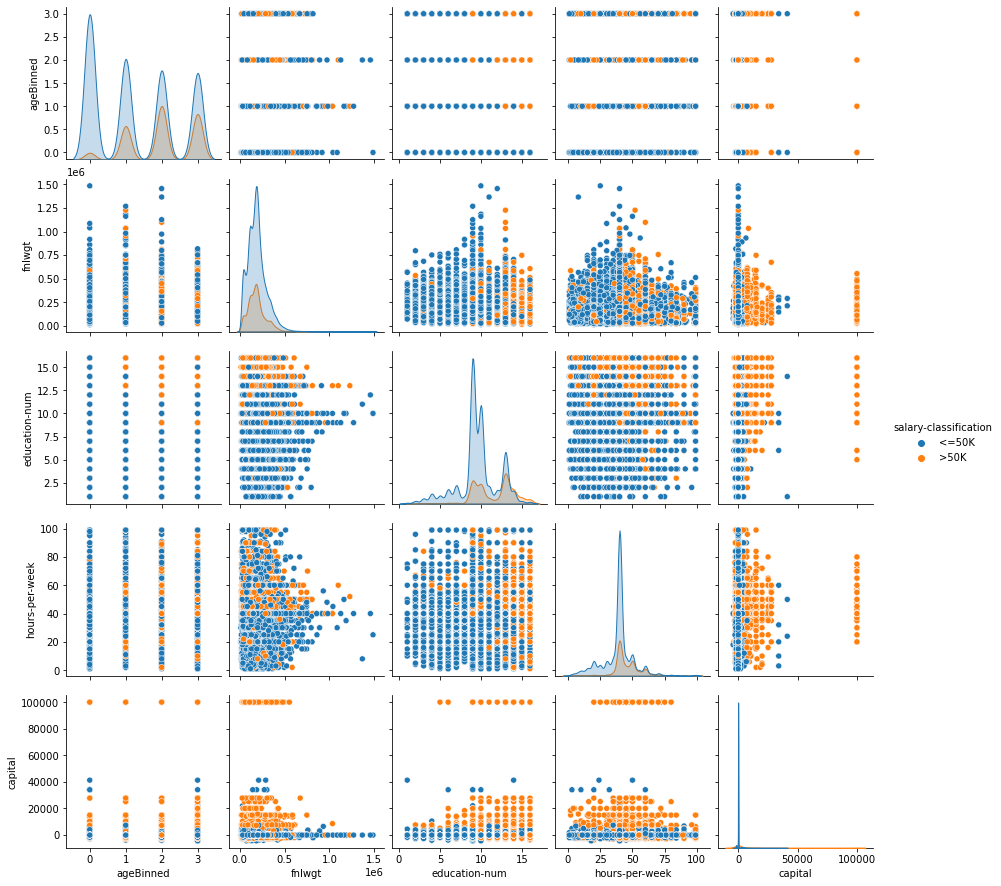

In [101]:
sns.pairplot(training, hue = 'salary-classification')

In [104]:
group = training[['education-num', 'salary-classification']]
sns.pairplot(x = group['education-num'], hue = 'salary-classification')
plt.savefig('na.pdf', format = 'pdf')

TypeError: pairplot() got an unexpected keyword argument 'x'

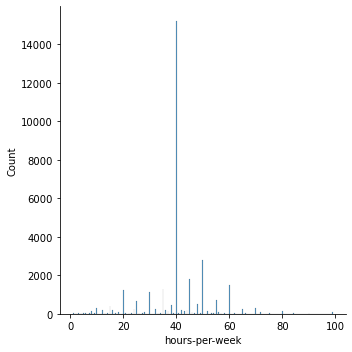

In [23]:
sns.displot(training, x = 'hours-per-week')

<AxesSubplot:xlabel='count', ylabel='education'>

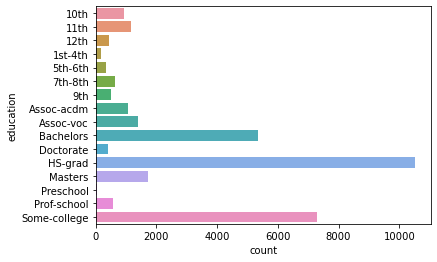

In [106]:
sns.countplot(y = 'education', data = training)

<AxesSubplot:xlabel='count', ylabel='race'>

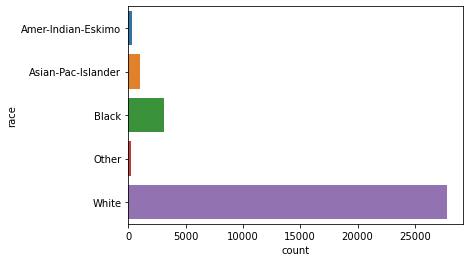

In [105]:
sns.countplot(y = 'race', data = training)

In [26]:
'''
res = []
for i in range(len(training)):
    if training.iloc[i]['race'] == 'White':
        res.append(1)
    else:
        res.append(0)

training['res'] = res

training = training.drop(columns = 'race')
training = training.rename(columns = {'res':'race'})  
'''

"\nres = []\nfor i in range(len(training)):\n    if training.iloc[i]['race'] == 'White':\n        res.append(1)\n    else:\n        res.append(0)\n\ntraining['res'] = res\n\ntraining = training.drop(columns = 'race')\ntraining = training.rename(columns = {'res':'race'})  \n"

In [27]:
'''
res = []
for i in range(len(test)):
    if test.iloc[i]['race'] == 'White':
        res.append(1)
    else:
        res.append(0)

test['res'] = res

test = test.drop(columns = 'race')
test = test.rename(columns = {'res':'race'})
'''

"\nres = []\nfor i in range(len(test)):\n    if test.iloc[i]['race'] == 'White':\n        res.append(1)\n    else:\n        res.append(0)\n\ntest['res'] = res\n\ntest = test.drop(columns = 'race')\ntest = test.rename(columns = {'res':'race'})\n"

<AxesSubplot:xlabel='marital-status', ylabel='count'>

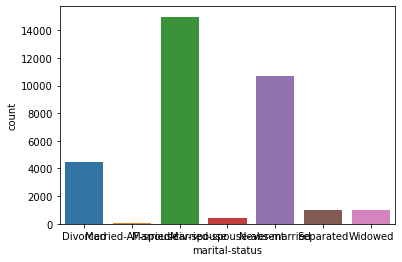

In [28]:
sns.countplot(x = 'marital-status', data = training)

<AxesSubplot:xlabel='occupation', ylabel='count'>

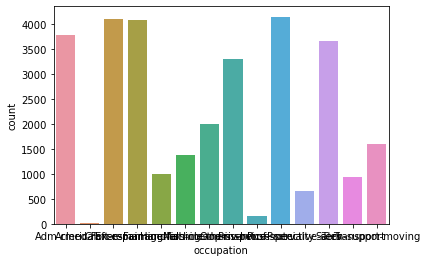

In [29]:
sns.countplot(x = 'occupation', data = training)

<AxesSubplot:xlabel='relationship', ylabel='count'>

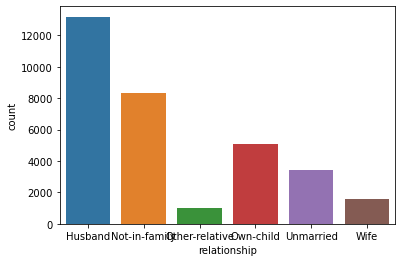

In [30]:
sns.countplot(x = 'relationship', data = training)

<AxesSubplot:xlabel='sex', ylabel='count'>

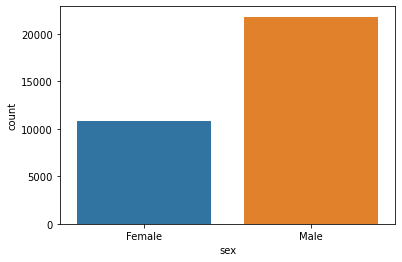

In [31]:
sns.countplot(x = 'sex', data = training)

<AxesSubplot:xlabel='workclass', ylabel='count'>

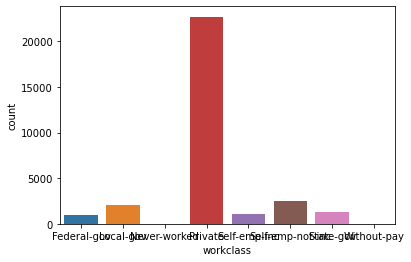

In [32]:
sns.countplot(x = 'workclass', data = training)

<AxesSubplot:xlabel='native-country', ylabel='count'>

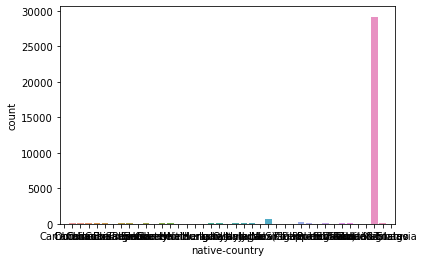

In [33]:
sns.countplot(x = 'native-country', data = training)

In [37]:
trainingNBGaussian = training.copy()
testNBGaussian = test.copy()

In [38]:
trainingNBGaussian['education'] = trainingNBGaussian['education'].astype('category').cat.codes
trainingNBGaussian['occupation'] = trainingNBGaussian['occupation'].astype('category').cat.codes
trainingNBGaussian['relationship'] = trainingNBGaussian['relationship'].astype('category').cat.codes
trainingNBGaussian['workclass'] = trainingNBGaussian['workclass'].astype('category').cat.codes
trainingNBGaussian['sex'] = trainingNBGaussian['sex'].astype('category').cat.codes
trainingNBGaussian['native-country'] = trainingNBGaussian['native-country'].astype('category').cat.codes
trainingNBGaussian['race'] = trainingNBGaussian['race'].astype('category').cat.codes
trainingNBGaussian['salary-classification'] = trainingNBGaussian['salary-classification'].astype('category').cat.codes
trainingNBGaussian['marital-status'] = trainingNBGaussian['marital-status'].astype('category').cat.codes

testNBGaussian['education'] = testNBGaussian['education'].astype('category').cat.codes
testNBGaussian['occupation'] = testNBGaussian['occupation'].astype('category').cat.codes
testNBGaussian['relationship'] = testNBGaussian['relationship'].astype('category').cat.codes
testNBGaussian['workclass'] = testNBGaussian['workclass'].astype('category').cat.codes
testNBGaussian['sex'] = testNBGaussian['sex'].astype('category').cat.codes
testNBGaussian['native-country'] = testNBGaussian['native-country'].astype('category').cat.codes
testNBGaussian['race'] = testNBGaussian['race'].astype('category').cat.codes
testNBGaussian['salary-classification'] = testNBGaussian['salary-classification'].astype('category').cat.codes
testNBGaussian['marital-status'] = testNBGaussian['marital-status'].astype('category').cat.codes

trainingNBGaussian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   ageBinned              32561 non-null  int8 
 1   workclass              32561 non-null  int8 
 2   fnlwgt                 32561 non-null  int64
 3   education              32561 non-null  int8 
 4   education-num          32561 non-null  int64
 5   marital-status         32561 non-null  int8 
 6   occupation             32561 non-null  int8 
 7   relationship           32561 non-null  int8 
 8   race                   32561 non-null  int8 
 9   sex                    32561 non-null  int8 
 10  capital-gain           32561 non-null  int64
 11  capital-loss           32561 non-null  int64
 12  hours-per-week         32561 non-null  int64
 13  native-country         32561 non-null  int8 
 14  salary-classification  32561 non-null  int8 
dtypes: int64(5), int8(10)
memory usage: 

       ageBinned  salary-classification
0              2                      0
1              3                      0
2              2                      0
3              3                      0
4              0                      0
...          ...                    ...
32556          0                      0
32557          2                      1
32558          3                      0
32559          0                      0
32560          3                      1

[32561 rows x 2 columns]
ageBinned  salary-classification
0          0                        8521
1          0                        5900
2          0                        5225
3          0                        5074
2          1                        3016
3          1                        2565
1          1                        1883
0          1                         377
dtype: int64


ValueError: need at least one array to concatenate

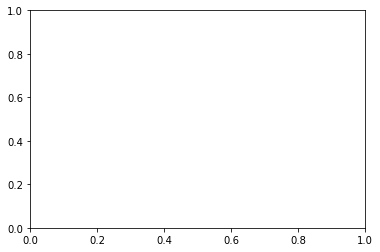

In [66]:
group = trainingNBGaussian[['ageBinned', 'salary-classification']]
age = [0, 1, 2, 3]
print(group)
salary = group.value_counts()
print(salary)
plt.stackplot(x = age, y = group, colors = ['green','blue'])


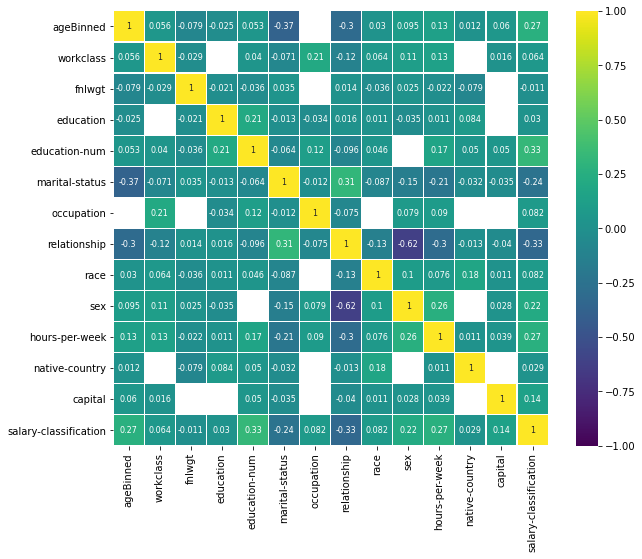

In [36]:
corr = trainingNBGaussian.corr("spearman")
plt.figure(figsize = (10,8))
sns_plot = sns.heatmap(corr[(corr >= 0.01) | (corr <= -0.01)], 
                       cmap = 'viridis', vmax = 1, vmin = -1.0, linewidths = 0.1, annot = True, annot_kws = {"size":8}, square = True)

## Remover features sem valor adicional

#### Após a análise de correlação e da distribuição das variáveis categóricas, notamos que as seguintes features podem ser removidas:

In [14]:
# Visto que já possuimos a variável 'education-num' que dá exatamente a mesma informação
trainingNBGaussian = trainingNBGaussian.drop(columns = ['education'])
# Devido à baixa dispersão dos dados, pelo que tem baixo valor informativo
trainingNBGaussian = trainingNBGaussian.drop(columns = ['native-country'])

trainingNBGaussian = trainingNBGaussian.drop(columns = ['fnlwgt'])
trainingNBGaussian = trainingNBGaussian.drop(columns = ['race'])

testNBGaussian = testNBGaussian.drop(columns = ['education'])
testNBGaussian = testNBGaussian.drop(columns = ['native-country'])

testNBGaussian = testNBGaussian.drop(columns = ['fnlwgt'])
testNBGaussian = testNBGaussian.drop(columns = ['race'])

trainingNBGaussian

,ageBinned,workclass,education-num,marital-status,occupation,relationship,sex,hours-per-week,capital,salary-classification
0,2,6,13,4,0,1,1,40,2174,0
1,3,5,13,2,3,0,1,13,0,0
2,2,3,9,0,5,1,1,40,0,0
3,3,3,7,2,5,0,1,40,0,0
4,0,3,13,2,9,5,0,40,0,0
...,...,...,...,...,...,...,...,...,...,...
32556,0,3,12,2,12,5,0,38,0,0
32557,2,3,9,2,6,0,1,40,0,1
32558,3,3,9,6,0,4,0,40,0,0
32559,0,3,9,4,0,3,1,20,0,0


#### Após os modelos preditivos, foi executado um feature selection relativamente à importância de cada feature relativamente ao Modelo de AdaBoost com Decision Tree. 
#### Com isto, chegou-se à conclusão que as features 'marital-status' e 'sex' eram pouco interessante, pelo que foi removida

In [15]:
trainingNBGaussian = trainingNBGaussian.drop(columns = 'marital-status')
testNBGaussian = testNBGaussian.drop(columns = 'marital-status')
trainingNBGaussian = trainingNBGaussian.drop(columns = 'sex')
testNBGaussian = testNBGaussian.drop(columns = 'sex')

In [16]:
trainingNBGaussian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   ageBinned              32561 non-null  int8 
 1   workclass              32561 non-null  int8 
 2   education-num          32561 non-null  int64
 3   occupation             32561 non-null  int8 
 4   relationship           32561 non-null  int8 
 5   hours-per-week         32561 non-null  int64
 6   capital                32561 non-null  int64
 7   salary-classification  32561 non-null  int8 
dtypes: int64(3), int8(5)
memory usage: 922.3 KB


In [40]:
trainingNBGaussian

,ageBinned,workclass,education-num,occupation,relationship,hours-per-week,capital,salary-classification
0,2,6,13,0,1,40,2174,0
1,3,5,13,3,0,13,0,0
2,2,3,9,5,1,40,0,0
3,3,3,7,5,0,40,0,0
4,0,3,13,9,5,40,0,0
...,...,...,...,...,...,...,...,...
32556,0,3,12,12,5,38,0,0
32557,2,3,9,6,0,40,0,1
32558,3,3,9,0,4,40,0,0
32559,0,3,9,0,3,20,0,0


# Modelos Preditivos

## Naive Bayes

#### Naive Bayes Gaussiano 
(com a transformação de todas variáveis a categóricas)

In [18]:
train_x = trainingNBGaussian.drop(columns = 'salary-classification')
train_y = trainingNBGaussian['salary-classification']

test_x = testNBGaussian.drop(columns = 'salary-classification')
test_y = testNBGaussian['salary-classification']

In [19]:
trainingNBGaussian.head()

,ageBinned,workclass,education-num,occupation,relationship,hours-per-week,capital,salary-classification
0,2,6,13,0,1,40,2174,0
1,3,5,13,3,0,13,0,0
2,2,3,9,5,1,40,0,0
3,3,3,7,5,0,40,0,0
4,0,3,13,9,5,40,0,0


#### Training

In [43]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import QuantileTransformer

pipeline = make_pipeline(QuantileTransformer(output_distribution = 'normal'), GaussianNB())
pipeline.fit(train_x, train_y)

Pipeline(steps=[('quantiletransformer',
                 QuantileTransformer(output_distribution='normal')),
                ('gaussiannb', GaussianNB())])

In [44]:
testNBGaussian.head()

,ageBinned,workclass,education-num,occupation,relationship,hours-per-week,capital,salary-classification
0,0,3,7,6,3,40,0,0
1,2,3,9,4,0,50,0,0
2,0,1,12,10,0,40,0,1
3,2,3,10,6,0,40,7688,1
4,0,-1,10,-1,3,30,0,0


In [45]:
predictions = pipeline.predict(test_x)
predictions

array([0, 0, 0, ..., 1, 1, 1], dtype=int8)

In [22]:
from sklearn.metrics import classification_report
print(classification_report(test_y, predictions))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92     12435
           1       0.78      0.63      0.70      3846

    accuracy                           0.87     16281
   macro avg       0.83      0.79      0.81     16281
weighted avg       0.87      0.87      0.87     16281



## K Nearest Neighbors

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(train_x, train_y)

KNeighborsClassifier(n_neighbors=1)

In [48]:
pred = knn.predict(test_x)
pred

array([0, 1, 1, ..., 1, 0, 0], dtype=int8)

In [49]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(test_y, pred))
print(classification_report(test_y, pred))

[[10970  1465]
 [ 1403  2443]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88     12435
           1       0.63      0.64      0.63      3846

    accuracy                           0.82     16281
   macro avg       0.76      0.76      0.76     16281
weighted avg       0.82      0.82      0.82     16281



In [50]:
error_rate = []

# Will take some time
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(train_x, train_y)
    pred_i = knn.predict(test_x)
    error_rate.append(np.mean(pred_i != test_y))

Text(0, 0.5, 'Error Rate')

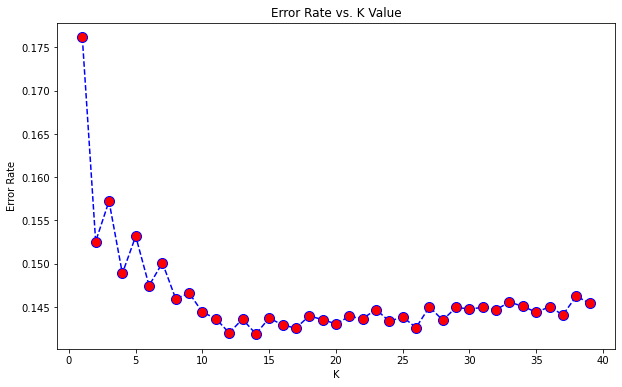

In [51]:
plt.figure(figsize = (10,6))
plt.plot(range(1, 40), error_rate, color = 'blue', linestyle = 'dashed', marker = 'o',
         markerfacecolor = 'red', markersize = 10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

#### O erro é menor à volta do K = 14
* K = 1

In [52]:
knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(train_x, train_y)
pred = knn.predict(test_x)

print('WITH K = 1')
print('\n')
print(confusion_matrix(test_y, pred))
print('\n')
print(classification_report(test_y, pred))

WITH K = 1


[[10970  1465]
 [ 1403  2443]]


              precision    recall  f1-score   support

           0       0.89      0.88      0.88     12435
           1       0.63      0.64      0.63      3846

    accuracy                           0.82     16281
   macro avg       0.76      0.76      0.76     16281
weighted avg       0.82      0.82      0.82     16281



* K = 14

In [53]:
knn = KNeighborsClassifier(n_neighbors = 14)

knn.fit(train_x, train_y)
pred = knn.predict(test_x)

print('WITH K = 14')
print('\n')
print(confusion_matrix(test_y, pred))
print('\n')
print(classification_report(test_y, pred))

WITH K = 14


[[11811   624]
 [ 1686  2160]]


              precision    recall  f1-score   support

           0       0.88      0.95      0.91     12435
           1       0.78      0.56      0.65      3846

    accuracy                           0.86     16281
   macro avg       0.83      0.76      0.78     16281
weighted avg       0.85      0.86      0.85     16281



## Random Forest Trees

In [28]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)# Train the model on training data
rf.fit(train_x, train_y);

In [55]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_x)# Calculate the absolute errors

In [56]:
print(predictions)

[0 0 1 ... 1 0 1]


In [57]:
print(classification_report(test_y, predictions))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90     12435
           1       0.70      0.62      0.66      3846

    accuracy                           0.85     16281
   macro avg       0.80      0.77      0.78     16281
weighted avg       0.84      0.85      0.85     16281



## Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier

decisionTree = DecisionTreeClassifier(random_state = 42)

decisionTree.fit(train_x, train_y)

DecisionTreeClassifier(random_state=42)

In [59]:
predictions = decisionTree.predict(test_x)
predictions

array([0, 0, 1, ..., 1, 1, 1], dtype=int8)

In [60]:
print(classification_report(test_y, predictions))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89     12435
           1       0.66      0.60      0.63      3846

    accuracy                           0.83     16281
   macro avg       0.77      0.75      0.76     16281
weighted avg       0.83      0.83      0.83     16281



## Adaboost com Decision Tree
* Diminui a variância e o bias do modelo

In [42]:
from sklearn.ensemble import AdaBoostClassifier

# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators = 1000,
                         learning_rate = 1,
                         random_state = 42)

# Train Adaboost Classifer
model = abc.fit(train_x, train_y)

#Predict the response for test dataset
predictions = model.predict(test_x)

predictions

array([0, 0, 0, ..., 1, 0, 1], dtype=int8)

In [43]:
print(classification_report(test_y, predictions))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92     12435
           1       0.77      0.64      0.70      3846

    accuracy                           0.87     16281
   macro avg       0.83      0.79      0.81     16281
weighted avg       0.87      0.87      0.87     16281



## Support Vector Machines

In [63]:
from sklearn.svm import SVC

In [98]:
svc_model = SVC()

In [ ]:
svc_model.fit(train_x, train_y)

In [ ]:
predictions = svc_model.predict(test_x)
predictions

In [ ]:
print(classification_report(test_y, predictions))

## Stacking

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

In [32]:
estimators = [
    ('knn', KNeighborsClassifier(n_neighbors = 14)),
    ('rf', RandomForestClassifier(n_estimators = 200, random_state = 42)),
    ('ada', AdaBoostClassifier(n_estimators = 200, learning_rate = 1, random_state = 42))
    ]

clf = StackingClassifier(
    estimators = estimators,
    final_estimator = LogisticRegression(),
    cv = 10
)

In [33]:
clf.fit(train_x, train_y)
predictions = clf.predict(test_x)

In [34]:
print(classification_report(test_y, predictions))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     12435
           1       0.76      0.60      0.67      3846

    accuracy                           0.86     16281
   macro avg       0.82      0.77      0.79     16281
weighted avg       0.85      0.86      0.85     16281



## Imbalanced Sampling

In [35]:
import imblearn
import collections as colect

counter = colect.Counter(train_y)
counter

Counter({0: 24720, 1: 7841})

In [36]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import 

# transform the dataset
oversample = SMOTE(sampling_strategy = 0.4)
undersample = RandomUnderSampler(sampling_strategy = 0.4)

over_train_x, over_train_y = oversample.fit_resample(train_x, train_y)
under_train_x, under_train_y = undersample.fit_resample(train_x, train_y)

In [37]:
counter1 = colect.Counter(over_train_y)
counter2 = colect.Counter(under_train_y)
print(counter1)
print(counter2)

Counter({0: 24720, 1: 9888})
Counter({0: 19602, 1: 7841})


### Alguns modelos com oversampling

In [38]:
# Train Adaboost Classifer
model = abc.fit(over_train_x, over_train_y)

#Predict the response for test dataset
predictions = model.predict(test_x)

predictions

array([0, 0, 0, ..., 1, 0, 1], dtype=int8)

In [39]:
print(classification_report(test_y, predictions))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92     12435
           1       0.74      0.69      0.71      3846

    accuracy                           0.87     16281
   macro avg       0.82      0.81      0.81     16281
weighted avg       0.87      0.87      0.87     16281



In [78]:
clf.fit(over_train_x, over_train_y)
predictions = clf.predict(test_x)

In [79]:
print(classification_report(test_y, predictions))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91     12435
           1       0.73      0.65      0.68      3846

    accuracy                           0.86     16281
   macro avg       0.81      0.79      0.80     16281
weighted avg       0.85      0.86      0.86     16281



### Alguns modelos com undersampling

* AdaBoost de Decision Tree

In [40]:
# Train Adaboost Classifer
model = abc.fit(under_train_x, under_train_y)

#Predict the response for test dataset
predictions = model.predict(test_x)

In [41]:
print(classification_report(test_y, predictions))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91     12435
           1       0.74      0.69      0.71      3846

    accuracy                           0.87     16281
   macro avg       0.82      0.81      0.81     16281
weighted avg       0.87      0.87      0.87     16281



* Stacking

In [82]:
clf.fit(under_train_x, under_train_y)
predictions = clf.predict(test_x)

In [83]:
print(classification_report(test_y, predictions))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91     12435
           1       0.73      0.63      0.68      3846

    accuracy                           0.86     16281
   macro avg       0.81      0.78      0.79     16281
weighted avg       0.85      0.86      0.85     16281



### Feature Importance

#### Após a execução dos modelos preditivos, foi efetuada uma análise da importância das features para um dos nossos melhores modelos (AdaBoost com Decision Tree)

In [84]:
train_x

,ageBinned,workclass,education-num,occupation,relationship,hours-per-week,capital
0,2,6,13,0,1,40,2174
1,3,5,13,3,0,13,0
2,2,3,9,5,1,40,0
3,3,3,7,5,0,40,0
4,0,3,13,9,5,40,0
...,...,...,...,...,...,...,...
32556,0,3,12,12,5,38,0
32557,2,3,9,6,0,40,0
32558,3,3,9,0,4,40,0
32559,0,3,9,0,3,20,0


Feature: 0, Score: 0.06000
Feature: 1, Score: 0.02000
Feature: 2, Score: 0.12000
Feature: 3, Score: 0.12000
Feature: 4, Score: 0.12000
Feature: 5, Score: 0.06000
Feature: 6, Score: 0.50000


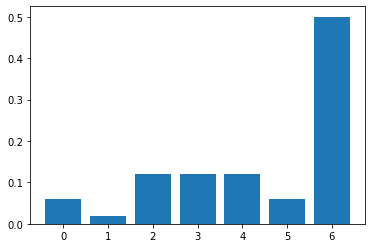

In [85]:
importance = abc.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i, v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.08423
Feature: 1, Score: 0.06466
Feature: 2, Score: 0.16821
Feature: 3, Score: 0.10367
Feature: 4, Score: 0.20626
Feature: 5, Score: 0.15691
Feature: 6, Score: 0.21606


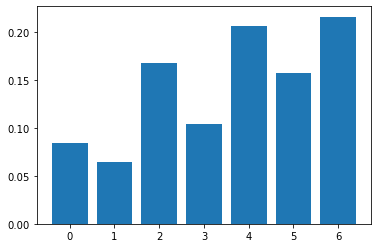

In [86]:
importance = rf.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i, v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

* Ficamos, assim, com um modelo que possui apenas 7 features, uma diminuição acentuada relativamente às 14 iniciais

# Avaliação dos Modelos

In [87]:
numeroCasosPositivos = len(test[test['salary-classification'] == '>50K'])
numeroCasosTotais = len(test)

print('Em relação ao dataset de teste temos que:\n')
print('Número de Casos Positivos (">50K"):', numeroCasosPositivos)
print('Número de Casos Totais:', numeroCasosTotais)

Em relação ao dataset de teste temos que:

Número de Casos Positivos (">50K"): 3846
Número de Casos Totais: 16281


In [88]:
percent = numeroCasosPositivos/numeroCasosTotais
print('Ou seja, temos uma percentagem de ', 1-percent, ' casos negativos.')

Ou seja, temos uma percentagem de  0.7637737239727289  casos negativos.


<AxesSubplot:xlabel='salary-classification', ylabel='count'>

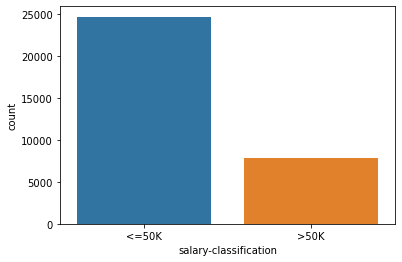

In [89]:
sns.countplot(x = 'salary-classification', data = training)

#### Temos um dataset de teste desbalanceado, pelo que a accuracy dos modelos desenvolvidos, apesar de alta, não transmite que o modelo é bom. 
* Um modelo que prevesse sempre '<=50K' teria 76.38% de accuracy

#### Os melhores modelos a nível de accuracy  são o AdaBoost de Decision Tree e K Nearest Neighbors, que possuem uma accuracy de 86%

#### Poderíamos agora olhar para o F-Measure (ou F-Score) da classe 1, ou seja '>50K', destes dois modelos de forma a identificar aquele que prevê melhor esta classe
* O modelo com melhor F-Measure é o Adaboost de Decision Tree, pelo que este modelo seria a melhor escolha para este dataset